## 2.1 Introduction<a id='2.2_Introduction'></a>


This step focuses on collecting your data, organizing it, and making sure it's well defined. 

### 2.1.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

In this project, we are trying to create a anomoly detection system from the data provided on kaggle 
https://www.kaggle.com/tamilsel/healthcare-providers-data

### 2.2 Importing Libraries

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

###  2.3 Load the healthcare providers data

In [2]:
#hp_data = pd.read_csv("C:/Users/vrastogi/AppData/Local/Temp/Rar$DIa7592.31707/Healthcare Providers.csv",index_col= None )
hp_data=pd.read_csv("Healthcare Providers.csv",index_col=None)

In [3]:
hp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   index                                                     100000 non-null  int64 
 1   National Provider Identifier                              100000 non-null  int64 
 2   Last Name/Organization Name of the Provider               100000 non-null  object
 3   First Name of the Provider                                95745 non-null   object
 4   Middle Initial of the Provider                            70669 non-null   object
 5   Credentials of the Provider                               92791 non-null   object
 6   Gender of the Provider                                    95746 non-null   object
 7   Entity Type of the Provider                               100000 non-null  object
 8   Street Address 

In [4]:
### The most data types are objects. They need to be converted to correct categories

#### What should be our target variable ? 

In [5]:
hp_data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.5877778,305.2111111,157.2622222,160.9088889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.3152571
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.53939394,19.05757576


### The meanings of different codes are listed below
Healthcare fraud is considered a challenge for many societies. Health care funding that could be spent on medicine, care for the elderly, or emergency room visits is instead lost to fraudulent activities by materialistic practitioners or patients. With rising healthcare costs, healthcare fraud is a major contributor to these increasing healthcare costs.

Try out various unsupervised techniques to find the anomalies in the data.

Detailed Data File:

The following variables are included in the detailed Physician and Other Supplier data file (see Appendix A for a condensed version of variables included)).

npi – National Provider Identifier (NPI) for the performing provider on the claim. The provider NPI is the numeric identifier registered in NPPES.

nppesproviderlastorgname – When the provider is registered in NPPES as an individual (entity type code=’I’), this is the provider’s last name. When the provider is registered as an organization (entity type code = ‘O’), this is the organization's name.

nppesproviderfirst_name – When the provider is registered in NPPES as an individual (entity type code=’I’), this is the provider’s first name. When the provider is registered as an organization (entity type code = ‘O’), this will be blank.

nppesprovidermi – When the provider is registered in NPPES as an individual (entity type code=’I’), this is the provider’s middle initial. When the provider is registered as an organization (entity type code= ‘O’), this will be blank.

nppes_credentials – When the provider is registered in NPPES as an individual (entity type code=’I’), these are the provider’s credentials. When the provider is registered as an organization (entity type code = ‘O’), this will be blank.

nppesprovidergender – When the provider is registered in NPPES as an individual (entity type code=’I’), this is the provider’s gender. When the provider is registered as an organization (entity type code = ‘O’), this will be blank.

nppesentitycode – Type of entity reported in NPPES. An entity code of ‘I’ identifies providers registered as individuals and an entity type code of ‘O’ identifies providers registered as organizations.

nppesproviderstreet1 – The first line of the provider’s street address, as reported in NPPES.

nppesproviderstreet – The second line of the provider’s street address, as reported in NPPES.

nppesprovidercity – The city where the provider is located, as reported in NPPES.

nppesproviderzip – The provider’s zip code, as reported in NPPES.

nppesproviderstate – The state where the provider is located, as reported in NPPES. The fifty U.S. states and the District of Columbia are reported by the state postal abbreviation. The following values are used for all other areas:

'XX' = 'Unknown'
'AA' = 'Armed Forces Central/South America'
'AE' = 'Armed Forces Europe'
'AP' = 'Armed Forces Pacific'
'AS' = 'American Samoa'
'GU' = 'Guam'
'MP' = 'North Mariana Islands'
'PR' = 'Puerto Rico'
'VI' = 'Virgin Islands'
'ZZ' = 'Foreign Country'

nppesprovidercountry – The country where the provider is located, as reported in NPPES. The country code will be ‘US’ for any state or U.S. possession. For foreign countries (i.e., state values of ‘ZZ’), the provider country values include the following:
AE=United Arab Emirates IT=Italy
AG=Antigua JO= Jordan
AR=Argentina JP=Japan
AU=Australia KR=Korea
BO=Bolivia KW=Kuwait
BR=Brazil KY=Cayman Islands
CA=Canada LB=Lebanon
CH=Switzerland MX=Mexico
CN=China NL=Netherlands
CO=Colombia NO=Norway
DE= Germany NZ=New Zealand
ES= Spain PA=Panama
FR=France PK=Pakistan
GB=Great Britain RW=Rwanda
GR=Greece SA=Saudi Arabia
HU= Hungary SY=Syria
IL= Israel TH=Thailand
IN=India TR=Turkey
IS= Iceland VE=Venezuela

provider_type – Derived from the provider specialty code reported on the claim.

medicareparticipationindicator – Identifies whether the provider participates in Medicare and/or accepts the assigned assignment of Medicare allowed amounts.

placeofservice – Identifies whether the place of service submitted on the claims is a facility (value of ‘F’) or non-facility (value of ‘O’). Non-facility is generally an office setting; however other entities are included in non-facility.

hcpcs_code – HCPCS code used to identify the specific medical service furnished by the provider.

hcpcs_description – Description of the HCPCS code for the specific medical service furnished by the provider.

hcpcsdrugindicator –Identifies whether the HCPCS code for the specific service furnished by the provider is an HCPCS listed on the Medicare Part B Drug Average Sales Price (ASP) File.

linesrvccnt – Number of services provided; note that the metrics used to count the number provided can vary from service to service.

beneuniquecnt – Number of distinct Medicare beneficiaries receiving the service.

benedaysrvc_cnt – Number of distinct Medicare beneficiary/per day services.

averageMedicareallowed_amt – Average of the Medicare allowed amount for the service.

stdevMedicareallowed_amt – Standard deviation of the Medicare allowed amounts.

averagesubmittedchrg_amt – Average of the charges that the provider submitted for the service.

stdevsubmittedchrg_amt – Standard deviation of the charge amounts submitted by the provider.

averageMedicarepayment_amt – Average amount that Medicare paid after deductible and coinsurance amounts have been deducted for the line item service.

### Exploring the data

### Checking a random row in the dataset

In [6]:
hp_data1=hp_data.iloc[2]
hp_data1

index                                                                                                 3001884
National Provider Identifier                                                                       1306820956
Last Name/Organization Name of the Provider                                                          DUROCHER
First Name of the Provider                                                                            RICHARD
Middle Initial of the Provider                                                                              W
Credentials of the Provider                                                                               DPM
Gender of the Provider                                                                                      M
Entity Type of the Provider                                                                                 I
Street Address 1 of the Provider                                                            20 WASHINGTON AVE
Street Add

In [7]:
hp_data.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


 ###  Only 3 columns are showing numeric although several others should be numeric. The list of columns which should be numeric 

In [8]:
cols=["Number of Services",                                                                                       
"Number of Medicare Beneficiaries",                                                                           
"Number of Distinct Medicare Beneficiary/Per Day Services",                                                  
"Average Medicare Allowed Amount",                                                                         
"Average Submitted Charge Amount" ,                                                                          
"Average Medicare Payment Amount" ,                                                                  
"Average Medicare Standardized Amount" ]

In [9]:
hp_data2 = hp_data[cols].apply(pd.to_numeric, errors='coerce')
#hp_data[list]=pd.to_numeric(hp_data[list])

In [10]:
hp_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Number of Services                                        97347 non-null  float64
 1   Number of Medicare Beneficiaries                          99595 non-null  float64
 2   Number of Distinct Medicare Beneficiary/Per Day Services  98500 non-null  float64
 3   Average Medicare Allowed Amount                           99255 non-null  float64
 4   Average Submitted Charge Amount                           93277 non-null  float64
 5   Average Medicare Payment Amount                           99534 non-null  float64
 6   Average Medicare Standardized Amount                      99530 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB


###  We lost several data points due to special characters in the dataset. Removing special character , after making a copy of original dataframe

In [11]:
hp_data3=hp_data

In [12]:
hp_data3[cols] = hp_data3[cols].replace(',','', regex=True)

In [13]:
hp_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   index                                                     100000 non-null  int64 
 1   National Provider Identifier                              100000 non-null  int64 
 2   Last Name/Organization Name of the Provider               100000 non-null  object
 3   First Name of the Provider                                95745 non-null   object
 4   Middle Initial of the Provider                            70669 non-null   object
 5   Credentials of the Provider                               92791 non-null   object
 6   Gender of the Provider                                    95746 non-null   object
 7   Entity Type of the Provider                               100000 non-null  object
 8   Street Address 

In [14]:
hp_data3[cols] = hp_data3[cols].apply(pd.to_numeric)

In [15]:
hp_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

### We have all the numeric columns converted without losing any data. Number of services column cannot be float so it has to be converted to integer

In [17]:
hp_data3['Number of Services']=hp_data3['Number of Services'].astype(int)
print(type(hp_data3['Number of Services']))

<class 'pandas.core.series.Series'>


### Trying different approaches to see the distribution of numerical columns distribution

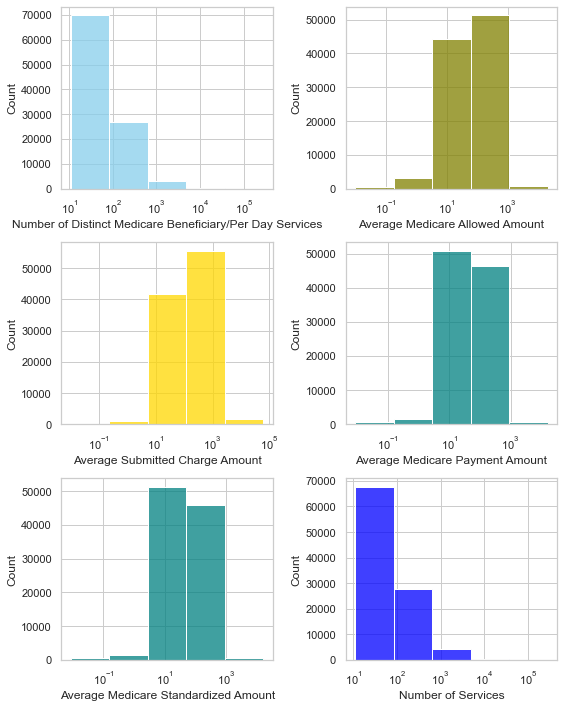

In [24]:
import seaborn as sns
sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,2, figsize = (8,10))
sns.histplot(data=hp_data3, x="Number of Distinct Medicare Beneficiary/Per Day Services",bins=5, color="skyblue",log_scale=True, ax=axs[0, 0])
sns.histplot(data=hp_data3, x="Average Medicare Allowed Amount",bins=5, color="olive",log_scale=True, ax=axs[0, 1])
sns.histplot(data=hp_data3, x="Average Submitted Charge Amount",bins=5, color="gold",log_scale=True, ax=axs[1, 0])
sns.histplot(data=hp_data3, x="Average Medicare Payment Amount",bins=5, color="teal",log_scale=True, ax=axs[1, 1])
sns.histplot(data=hp_data3, x="Average Medicare Standardized Amount",bins=5, color="teal",log_scale=True, ax=axs[2, 0])
sns.histplot(data=hp_data3, x="Number of Services", color="blue",bins=5,log_scale=True, ax=axs[2, 1])
fig.tight_layout()

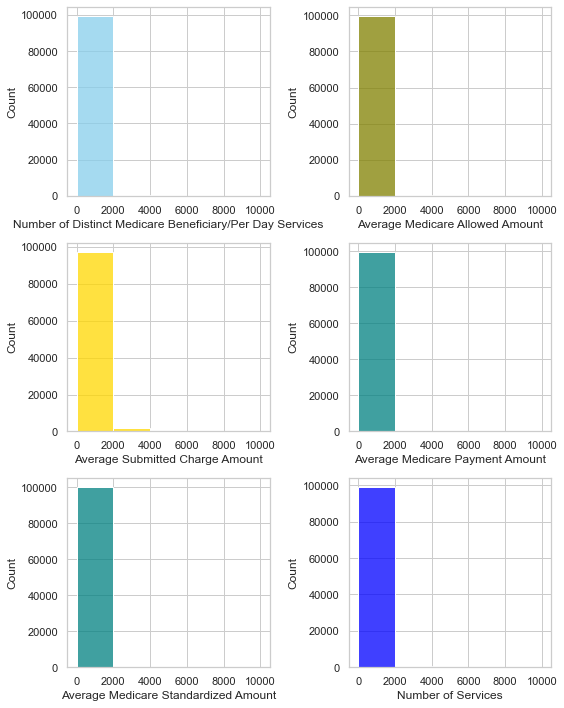

In [27]:
import seaborn as sns
sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,2, figsize = (8,10))
sns.histplot(data=hp_data3, x="Number of Distinct Medicare Beneficiary/Per Day Services",bins=5,binrange=(0,10000),color="skyblue", ax=axs[0, 0])
sns.histplot(data=hp_data3, x="Average Medicare Allowed Amount",bins=5, color="olive",binrange=(0,10000), ax=axs[0, 1])
sns.histplot(data=hp_data3, x="Average Submitted Charge Amount",bins=5, color="gold",binrange=(0,10000), ax=axs[1, 0])
sns.histplot(data=hp_data3, x="Average Medicare Payment Amount",bins=5, color="teal",binrange=(0,10000), ax=axs[1, 1])
sns.histplot(data=hp_data3, x="Average Medicare Standardized Amount",bins=5, color="teal",binrange=(0,10000), ax=axs[2, 0])
sns.histplot(data=hp_data3, x="Number of Services", color="blue",bins=5,binrange=(0,10000), ax=axs[2, 1])
fig.tight_layout()

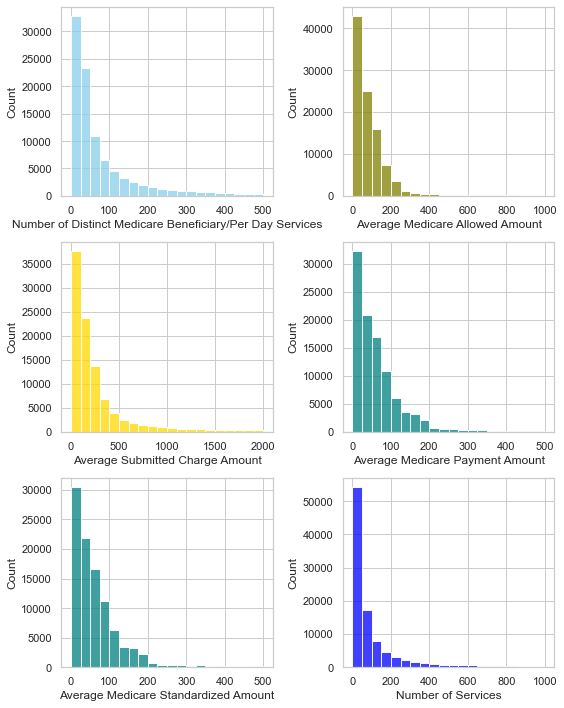

In [29]:
import seaborn as sns
sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,2, figsize = (8,10))
sns.histplot(data=hp_data3, x="Number of Distinct Medicare Beneficiary/Per Day Services",bins=20,binrange=(0,500),color="skyblue", ax=axs[0, 0])
sns.histplot(data=hp_data3, x="Average Medicare Allowed Amount",bins=20, color="olive",binrange=(0,1000), ax=axs[0, 1])
sns.histplot(data=hp_data3, x="Average Submitted Charge Amount",bins=20, color="gold",binrange=(0,2000), ax=axs[1, 0])
sns.histplot(data=hp_data3, x="Average Medicare Payment Amount",bins=20, color="teal",binrange=(0,500), ax=axs[1, 1])
sns.histplot(data=hp_data3, x="Average Medicare Standardized Amount",bins=20, color="teal",binrange=(0,500), ax=axs[2, 0])
sns.histplot(data=hp_data3, x="Number of Services", color="blue",bins=20,binrange=(0,1000), ax=axs[2, 1])
fig.tight_layout()

### Checking the distibution of average amount charged by country

In [40]:
import numpy as np
hp_data3.groupby('Country Code of the Provider')['Average Submitted Charge Amount'].agg(['min','max','mean','median','count'])

,min,max,mean,median,count
Country Code of the Provider,,,,,
DE,283.000000,1317.000000,679.519922,438.559767,3
JP,70.000000,190.000000,130.000000,130.000000,2
TR,102.333333,102.333333,102.333333,102.333333,1
US,0.010000,62694.000000,354.547717,146.000000,99994


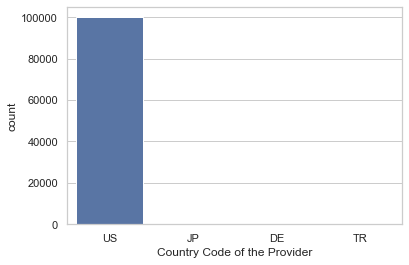

In [34]:
sns.countplot(x ='Country Code of the Provider', data = hp_data3)
 
# Show the plot
plt.show()

### This indicates that almost all the transactions are in US apart from 6 transaction

### Count PLot of number of transactions by state

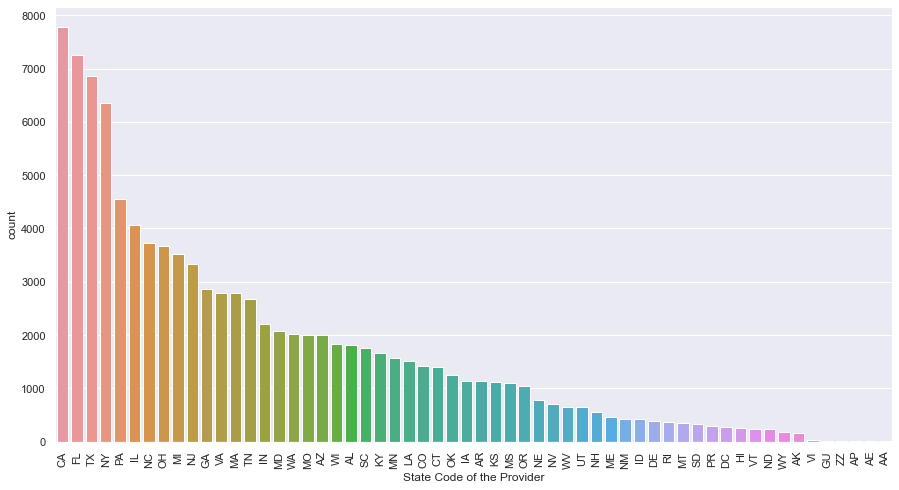

In [49]:
sns.set(rc = {'figure.figsize':(15,8)})
ax=sns.countplot(x = "State Code of the Provider",order =hp_data3['State Code of the Provider'].value_counts().index, data = hp_data3)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()